In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn as skl
import tensorflow as tf
import pickle

In [2]:
# Need to be able to pull user input from database to test with ML model

In [3]:
file_path = '../Cleaned Data/CleanData.csv'

In [4]:
df = pd.read_csv(file_path)
df = df.drop(columns=['Unnamed: 0'],axis=1)
df

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Pts  Spread Result  Total  Spread WL  \
0              210.92          -106.17   87     -18      L    192          0   
1              210.92          -108.83  105      18      W    192          1   
2              220.83          -108.33  100      -8      L    208          1   
3              220.83          -106.67  108       8      W    208          0   
4              221.08          -108.67  113       1      W    225          0   
...               ...              ...  ...     ...    ...    ...        ...   
2447           218.42          -107.17   99       4      W    194          0   
2448           225.50          -107.40  137      -6      L    280          1   
2449           225.50          -106.60  143       6      W    280          0   
2450           227.00          -107.67  131      -5      L    267          0   
2451           227.00          -107.33  136       5      W    267          1   

      Over/Under WL  MoneyLine WL  
0                 0             0  
1                 1             1  
2                 0             0  
3                 1             1  
4                 1             1  
...             ...           ...  
2447              1             1  
2448              1             0  
2449              0             1  
2450              1             0  
2451              0             1  

[2452 rows x 16 columns]

In [5]:
def correlation_graphs(df,target):
    
    i = 1
    count = 1
    
    named_columns = list(df.columns)
    columns_dict = {}
    col_num=1
    for name in named_columns:
        columns_dict[name] = col_num
        col_num +=1
    
    
    for i in list(range(1,10)):
        num_cols = 10-(i)

        if i == 9:
            break

        for j in list(range(1,num_cols)):
            j = i+j
            var1 = df.iloc[:,i]
            var2 = df.iloc[:,j]

            key1 = [k for k,v in columns_dict.items() if v == i]
            key2 = [k for k,v in columns_dict.items() if v == j]


            plt.scatter(var1,var2,label=df[target],c=df[target])
            plt.legend
            plt.show()
            print(count)
            print(f'{key1} vs {key2}')
            count +=1

# Moneyline

In [6]:
# Cleaning the Data to the Point it could be fed to ML Algorithm
# TeamId and GameId are taken out for the initial exploration of the data. If it is 
# determined we need more features / better correlation, we will merge more data 
# using these ID's

df_ML = df.copy()
df_ML = df_ML.drop(columns=['Spread WL','Over/Under WL'])
df_ML

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Pts  Spread Result  Total  \
0              210.92          -106.17   87     -18      L    192   
1              210.92          -108.83  105      18      W    192   
2              220.83          -108.33  100      -8      L    208   
3              220.83          -106.67  108       8      W    208   
4              221.08          -108.67  113       1      W    225   
...               ...              ...  ...     ...    ...    ...   
2447           218.42          -107.17   99       4      W    194   
2448           225.50          -107.40  137      -6      L    280   
2449           225.50          -106.60  143       6      W    280   
2450           227.00          -107.67  131      -5      L    267   
2451           227.00          -107.33  136       5      W    267   

      MoneyLine WL  
0                0  
1                1  
2                0  
3                1  
4                1  
...            ...  
2447             1  
2448             0  
2449             1  
2450             0  
2451             1  

[2452 rows x 14 columns]

In [7]:
# Now we need to focus on finding which features have correlation in order to include them 
# in the machine learning model.

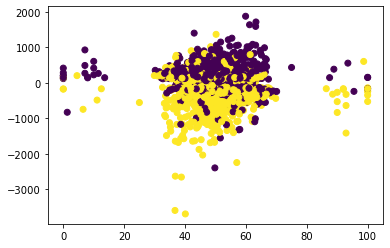

1
['Location'] vs ['PercentBet_ML']


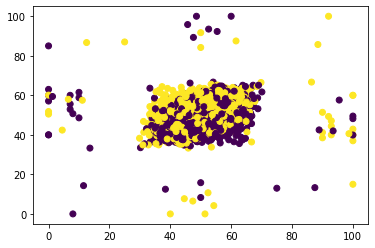

2
['Location'] vs ['Average_Line_ML']


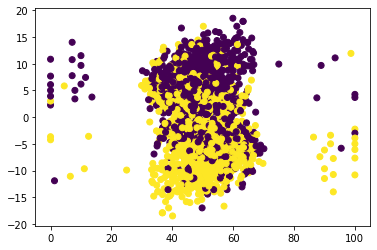

3
['Location'] vs ['PercentBet_Spread']


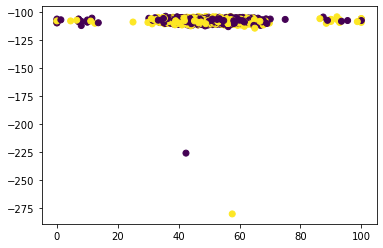

4
['Location'] vs ['Average_Line_Spread']


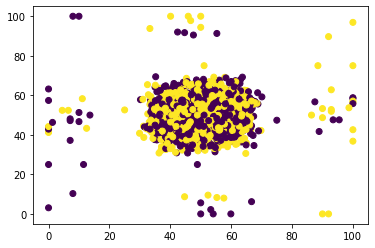

5
['Location'] vs ['Average_Odds_Spread']


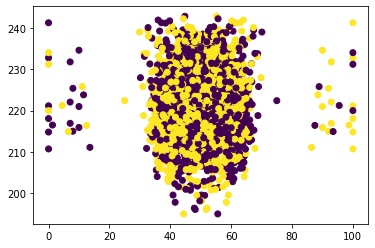

6
['Location'] vs ['PercentBet_OU']


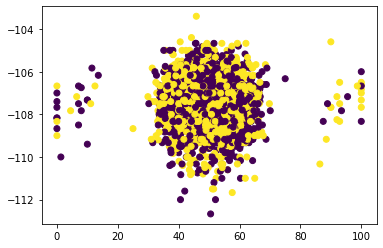

7
['Location'] vs ['Average_Line_OU']


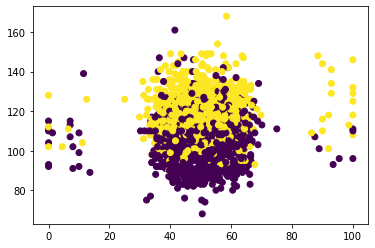

8
['Location'] vs ['Average_Odds_OU']


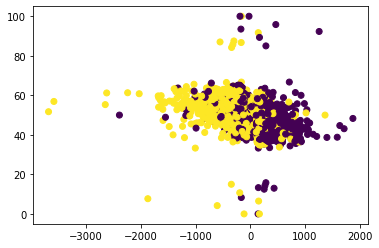

9
['PercentBet_ML'] vs ['Average_Line_ML']


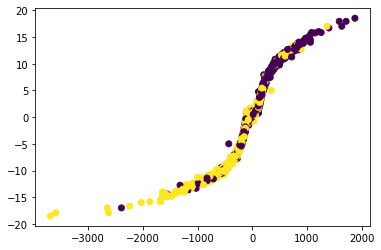

10
['PercentBet_ML'] vs ['PercentBet_Spread']


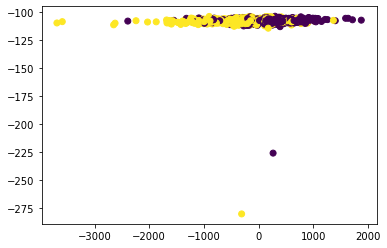

11
['PercentBet_ML'] vs ['Average_Line_Spread']


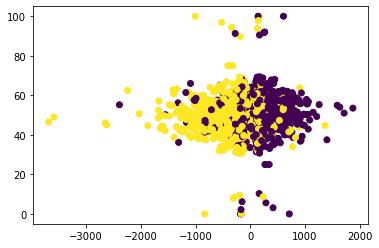

12
['PercentBet_ML'] vs ['Average_Odds_Spread']


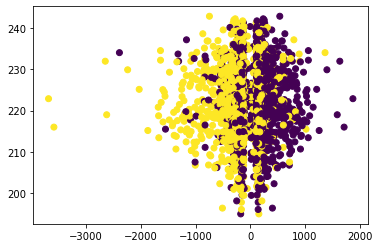

13
['PercentBet_ML'] vs ['PercentBet_OU']


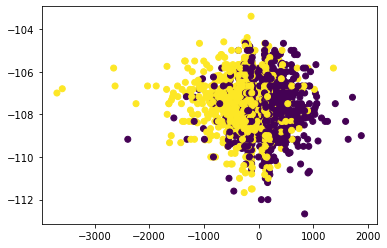

14
['PercentBet_ML'] vs ['Average_Line_OU']


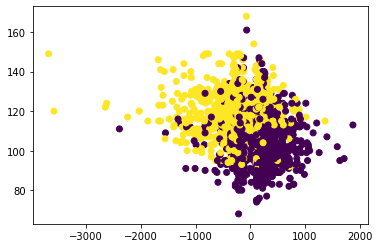

15
['PercentBet_ML'] vs ['Average_Odds_OU']


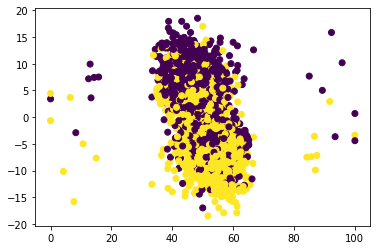

16
['Average_Line_ML'] vs ['PercentBet_Spread']


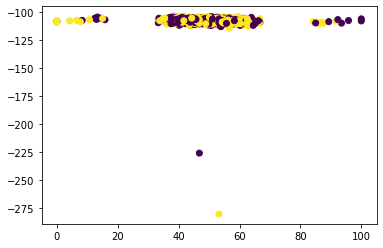

17
['Average_Line_ML'] vs ['Average_Line_Spread']


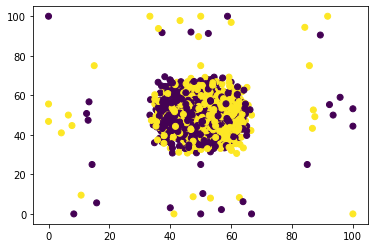

18
['Average_Line_ML'] vs ['Average_Odds_Spread']


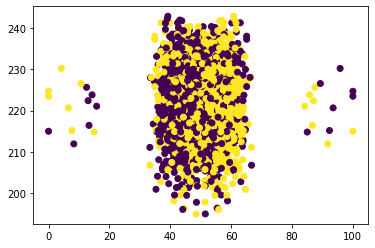

19
['Average_Line_ML'] vs ['PercentBet_OU']


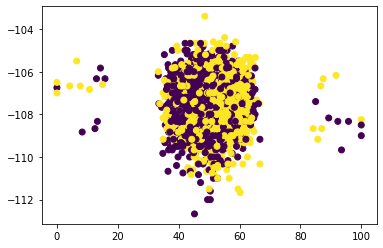

20
['Average_Line_ML'] vs ['Average_Line_OU']


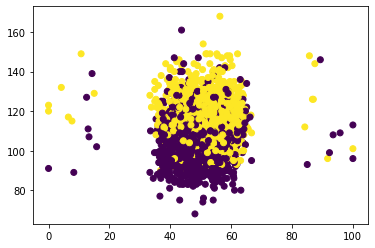

21
['Average_Line_ML'] vs ['Average_Odds_OU']


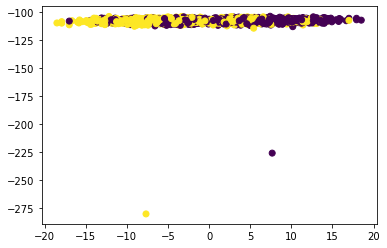

22
['PercentBet_Spread'] vs ['Average_Line_Spread']


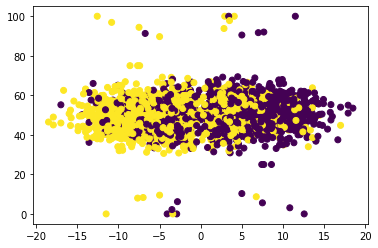

23
['PercentBet_Spread'] vs ['Average_Odds_Spread']


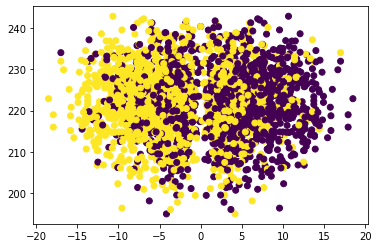

24
['PercentBet_Spread'] vs ['PercentBet_OU']


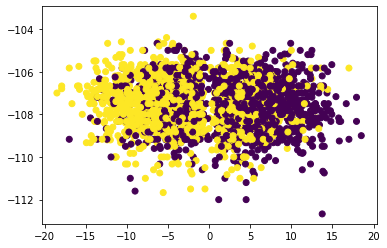

25
['PercentBet_Spread'] vs ['Average_Line_OU']


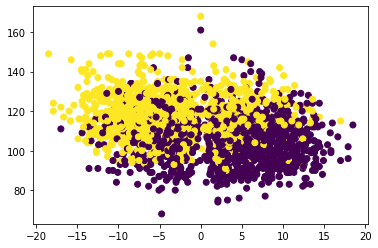

26
['PercentBet_Spread'] vs ['Average_Odds_OU']


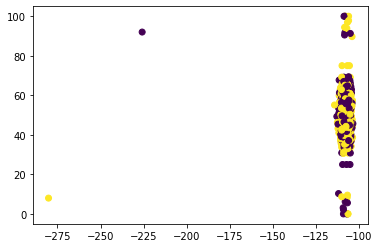

27
['Average_Line_Spread'] vs ['Average_Odds_Spread']


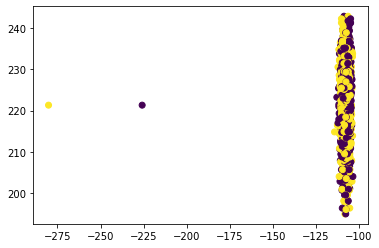

28
['Average_Line_Spread'] vs ['PercentBet_OU']


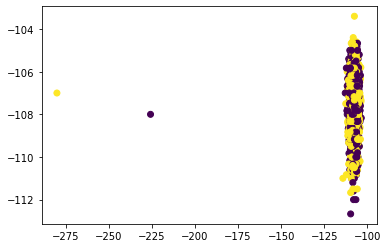

29
['Average_Line_Spread'] vs ['Average_Line_OU']


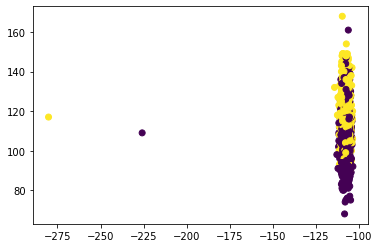

30
['Average_Line_Spread'] vs ['Average_Odds_OU']


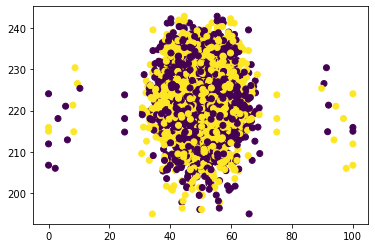

31
['Average_Odds_Spread'] vs ['PercentBet_OU']


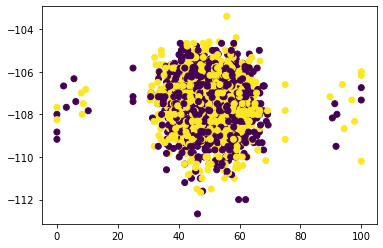

32
['Average_Odds_Spread'] vs ['Average_Line_OU']


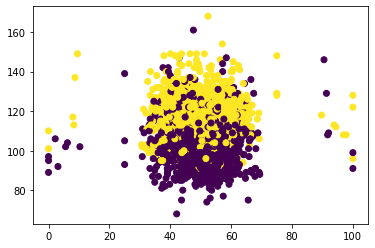

33
['Average_Odds_Spread'] vs ['Average_Odds_OU']


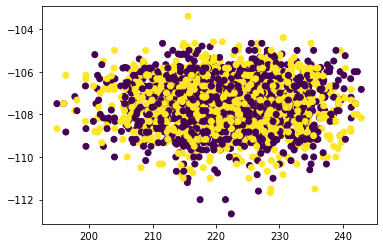

34
['PercentBet_OU'] vs ['Average_Line_OU']


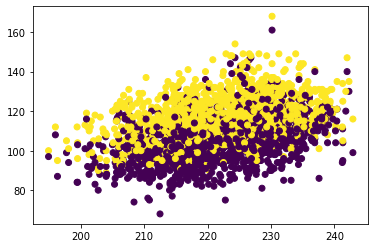

35
['PercentBet_OU'] vs ['Average_Odds_OU']


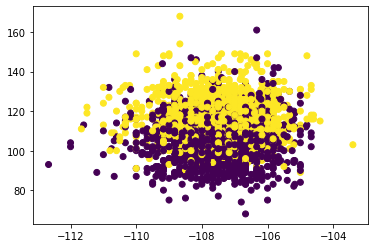

36
['Average_Line_OU'] vs ['Average_Odds_OU']


In [8]:
correlation_graphs(df_ML,'MoneyLine WL')

In [9]:
# Determining which Variables have correlation 
df_ML = df_ML[['Location','PercentBet_ML','Average_Line_ML','PercentBet_Spread','Average_Line_Spread','Average_Odds_Spread','PercentBet_OU','Average_Line_OU','Average_Odds_OU','MoneyLine WL']]
df_ML


Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  MoneyLine WL  
0              210.92          -106.17             0  
1              210.92          -108.83             1  
2              220.83          -108.33             0  
3              220.83          -106.67             1  
4              221.08          -108.67             1  
...               ...              ...           ...  
2447           218.42          -107.17             1  
2448           225.50          -107.40             0  
2449           225.50          -106.60             1  
2450           227.00          -107.67             0  
2451           227.00          -107.33             1  

[2452 rows x 10 columns]

In [10]:
# Converting categorical variables to numeric for ML algorithm
location_ML = pd.get_dummies(df_ML.Location)
final_ML_df = df_ML.join(location_ML).drop(columns='Location',axis=1)
final_ML_df

PercentBet_ML  Average_Line_ML  PercentBet_Spread  Average_Line_Spread  \
0              46.0            183.2               45.1                 4.70   
1              54.0           -210.4               54.9                -4.70   
2              55.7            713.6               42.4                12.50   
3              44.3          -1015.4               57.6               -12.50   
4              58.9           -162.0               58.6                -3.50   
...             ...              ...                ...                  ...   
2447           45.2           -888.8               59.6               -12.67   
2448           61.6            262.8               39.7                 7.33   
2449           38.4           -311.2               60.3                -7.33   
2450           58.1            131.0               58.3                 3.67   
2451           41.9           -147.8               41.7                -3.67   

      Average_Odds_Spread  PercentBet_OU  Average_Line_OU  Average_Odds_OU  \
0                 -105.80           56.9           210.92          -106.17   
1                 -108.20           43.1           210.92          -108.83   
2                 -106.00           52.2           220.83          -108.33   
3                 -109.83           47.8           220.83          -106.67   
4                 -109.40           56.7           221.08          -108.67   
...                   ...            ...              ...              ...   
2447              -107.67           43.8           218.42          -107.17   
2448              -108.67           46.5           225.50          -107.40   
2449              -110.17           53.5           225.50          -106.60   
2450              -107.50           55.7           227.00          -107.67   
2451              -107.50           44.3           227.00          -107.33   

      MoneyLine WL  away  home  
0                0     1     0  
1                1     0     1  
2                0     1     0  
3                1     0     1  
4                1     1     0  
...            ...   ...   ...  
2447             1     0     1  
2448             0     1     0  
2449             1     0     1  
2450             0     1     0  
2451             1     0     1  

[2452 rows x 11 columns]

In [11]:
# Splitting the target variable and the features
y_ML = final_ML_df['MoneyLine WL']
X_ML = final_ML_df.drop(columns='MoneyLine WL',axis=1).values

In [12]:
# Splitting Data into Training and Testing Sets
X_train_ML,X_test_ML,y_train_ML,y_test_ML = train_test_split(X_ML,y_ML,random_state=42)

In [13]:
# Scaling the data

# Create the instance of the scaler
scaler_ML = skl.preprocessing.StandardScaler()

# Fit the scaler 
scaler_ML.fit(X_train_ML)

# Now scale the data
X_train_scaled_ML = scaler_ML.transform(X_train_ML)
X_test_scaled_ML = scaler_ML.transform(X_test_ML)


# Export Standard Scaler
pickle.dump(scaler_ML,open('/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Test Connections/scaler_ML.pkl','wb'))
pickle.dump(scaler_ML,open("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Machine Learning/Models/scaler_ML.pkl",'wb'))

In [14]:
# Create the Neural Network Model (we will use Keras module and use a Sequential Model)
nn_model_ML = tf.keras.models.Sequential()

# Layers of the Keras Sequential Model are added using the Dense Class

# Adding First Hidden Layer and Input Dimension(10)
nn_model_ML.add(tf.keras.layers.Dense(units=10,activation='relu',input_dim=10))

# Adding Second Hidden Layer
#nn_model_ML.add(tf.keras.layers.Dense(units=20,activation='relu'))

# Adding Output Layer
nn_model_ML.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check Layout of Neural Network
nn_model_ML.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


2022-05-11 16:39:23.484311: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)


# Compile the Network
nn_model_ML.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Run the Network
fit_model_ML = nn_model_ML.fit(X_train_scaled_ML,y_train_ML,epochs=200)

Epoch 1/200
58/58 [==============================] - 0s 1ms/step - loss: 0.7906 - accuracy: 0.5155
Epoch 2/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5797
Epoch 3/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6275
Epoch 4/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.6455
Epoch 5/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6246 - accuracy: 0.6504
Epoch 6/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.6558
Epoch 7/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.6580
Epoch 8/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6580
Epoch 9/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.6650
Epoch 10/200
58/58 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.6661
Epoch 11/

Epoch 83/200
58/58 [==============================] - 0s 995us/step - loss: 0.5964 - accuracy: 0.6678
Epoch 84/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.6694
Epoch 85/200
58/58 [==============================] - 0s 956us/step - loss: 0.5963 - accuracy: 0.6699
Epoch 86/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.6721
Epoch 87/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.6732
Epoch 88/200
58/58 [==============================] - 0s 987us/step - loss: 0.5960 - accuracy: 0.6726
Epoch 89/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.6726
Epoch 90/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.6721
Epoch 91/200
58/58 [==============================] - 0s 954us/step - loss: 0.5956 - accuracy: 0.6743
Epoch 92/200
58/58 [==============================] - 0s 994us/step - loss: 0.5959 - accurac

58/58 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.6781
Epoch 164/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.6770
Epoch 165/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.6743
Epoch 166/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.6748
Epoch 167/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.6765
Epoch 168/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.6792
Epoch 169/200
58/58 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.6765
Epoch 170/200
58/58 [==============================] - 0s 972us/step - loss: 0.5921 - accuracy: 0.6775
Epoch 171/200
58/58 [==============================] - 0s 999us/step - loss: 0.5920 - accuracy: 0.6775
Epoch 172/200
58/58 [==============================] - 0s 993us/step - loss: 0.5918 - accuracy: 0.675

In [16]:
nn_model_ML.evaluate(X_test_scaled_ML,y_test_ML)

20/20 [==============================] - 0s 1ms/step - loss: 0.5848 - accuracy: 0.7080


[0.5847834348678589, 0.7079934477806091]

In [17]:
nn_model_ML.save("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Test Connections/nn_model_ML.h5")
nn_model_ML.save("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Machine Learning/Models/nn_model_ML.h5")

# Spread

In [18]:
df_spread = df.copy()
df_spread = df_spread.drop(columns=['Over/Under WL','MoneyLine WL'])
df_spread

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Pts  Spread Result  Total  Spread WL  
0              210.92          -106.17   87     -18      L    192          0  
1              210.92          -108.83  105      18      W    192          1  
2              220.83          -108.33  100      -8      L    208          1  
3              220.83          -106.67  108       8      W    208          0  
4              221.08          -108.67  113       1      W    225          0  
...               ...              ...  ...     ...    ...    ...        ...  
2447           218.42          -107.17   99       4      W    194          0  
2448           225.50          -107.40  137      -6      L    280          1  
2449           225.50          -106.60  143       6      W    280          0  
2450           227.00          -107.67  131      -5      L    267          0  
2451           227.00          -107.33  136       5      W    267          1  

[2452 rows x 14 columns]

In [19]:
# Now we need to focus on finding which features have correlation in order to include them 
# in the machine learning model.

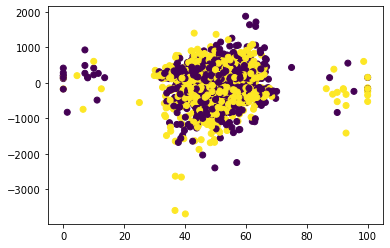

1
['Location'] vs ['PercentBet_ML']


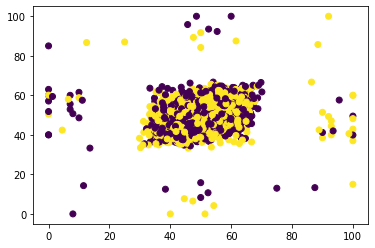

2
['Location'] vs ['Average_Line_ML']


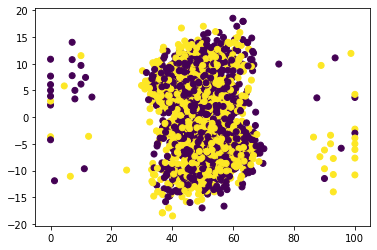

3
['Location'] vs ['PercentBet_Spread']


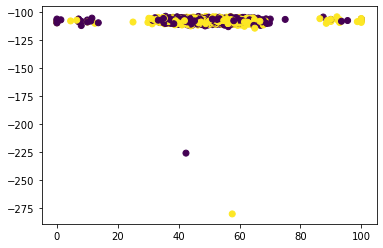

4
['Location'] vs ['Average_Line_Spread']


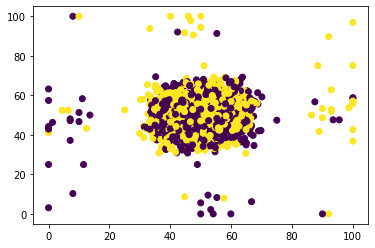

5
['Location'] vs ['Average_Odds_Spread']


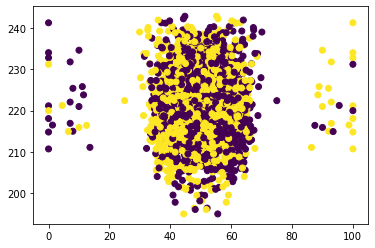

6
['Location'] vs ['PercentBet_OU']


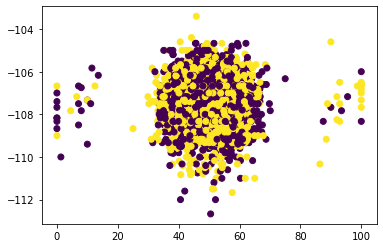

7
['Location'] vs ['Average_Line_OU']


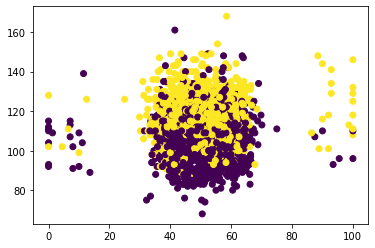

8
['Location'] vs ['Average_Odds_OU']


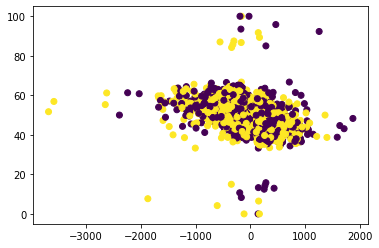

9
['PercentBet_ML'] vs ['Average_Line_ML']


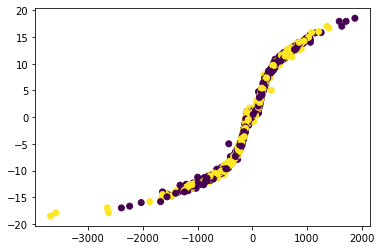

10
['PercentBet_ML'] vs ['PercentBet_Spread']


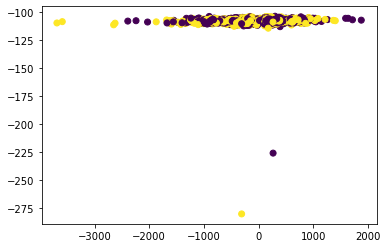

11
['PercentBet_ML'] vs ['Average_Line_Spread']


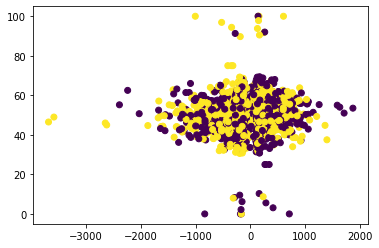

12
['PercentBet_ML'] vs ['Average_Odds_Spread']


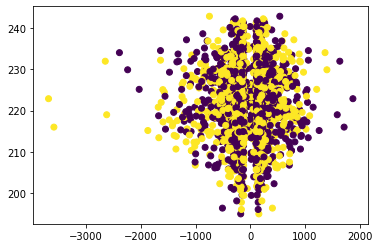

13
['PercentBet_ML'] vs ['PercentBet_OU']


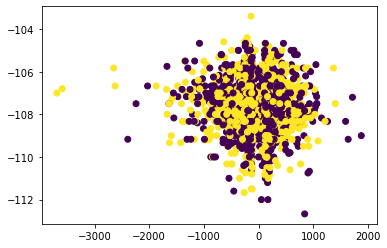

14
['PercentBet_ML'] vs ['Average_Line_OU']


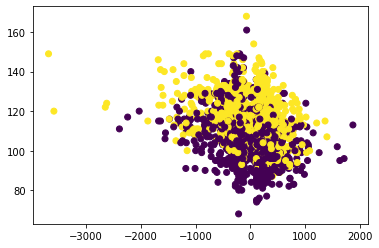

15
['PercentBet_ML'] vs ['Average_Odds_OU']


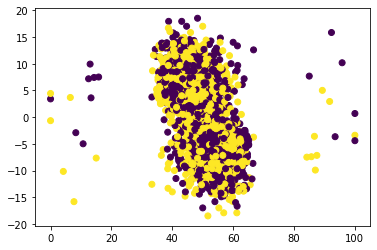

16
['Average_Line_ML'] vs ['PercentBet_Spread']


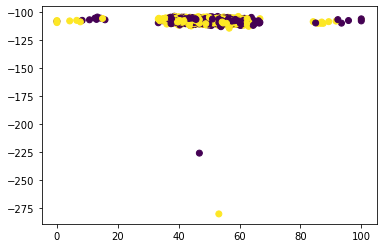

17
['Average_Line_ML'] vs ['Average_Line_Spread']


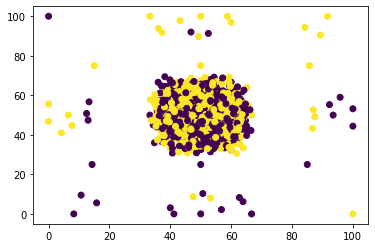

18
['Average_Line_ML'] vs ['Average_Odds_Spread']


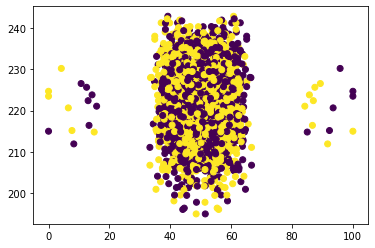

19
['Average_Line_ML'] vs ['PercentBet_OU']


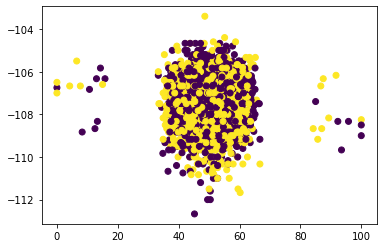

20
['Average_Line_ML'] vs ['Average_Line_OU']


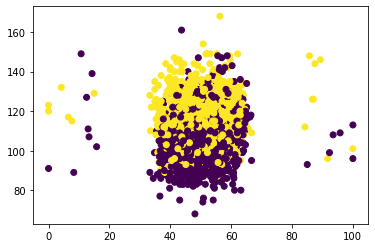

21
['Average_Line_ML'] vs ['Average_Odds_OU']


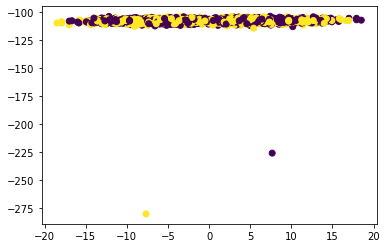

22
['PercentBet_Spread'] vs ['Average_Line_Spread']


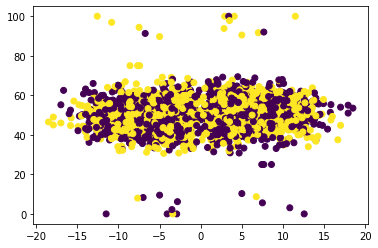

23
['PercentBet_Spread'] vs ['Average_Odds_Spread']


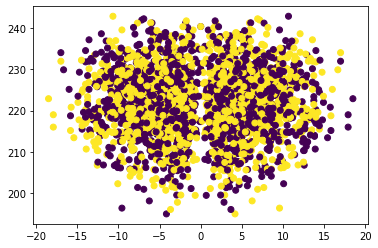

24
['PercentBet_Spread'] vs ['PercentBet_OU']


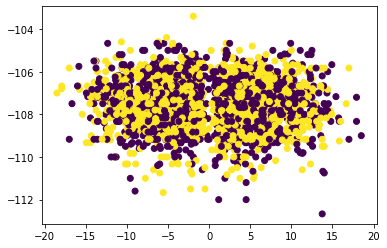

25
['PercentBet_Spread'] vs ['Average_Line_OU']


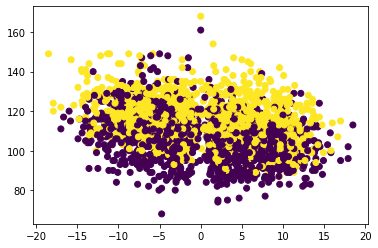

26
['PercentBet_Spread'] vs ['Average_Odds_OU']


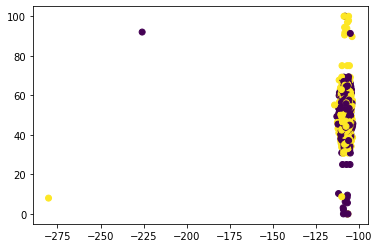

27
['Average_Line_Spread'] vs ['Average_Odds_Spread']


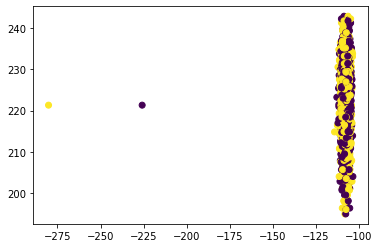

28
['Average_Line_Spread'] vs ['PercentBet_OU']


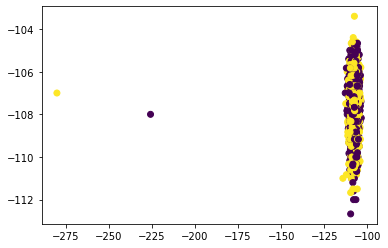

29
['Average_Line_Spread'] vs ['Average_Line_OU']


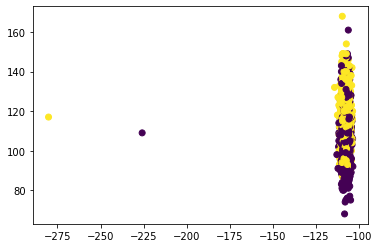

30
['Average_Line_Spread'] vs ['Average_Odds_OU']


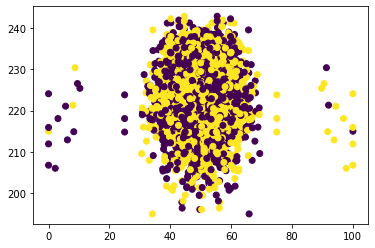

31
['Average_Odds_Spread'] vs ['PercentBet_OU']


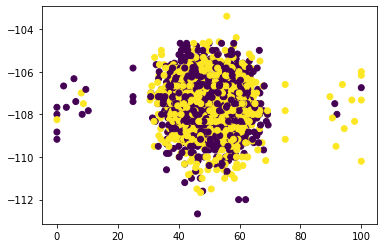

32
['Average_Odds_Spread'] vs ['Average_Line_OU']


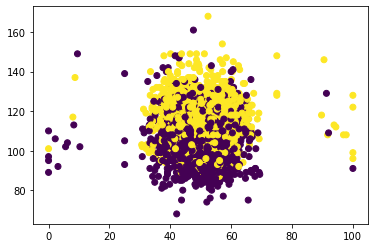

33
['Average_Odds_Spread'] vs ['Average_Odds_OU']


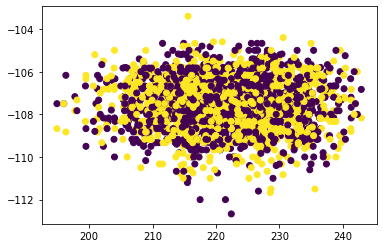

34
['PercentBet_OU'] vs ['Average_Line_OU']


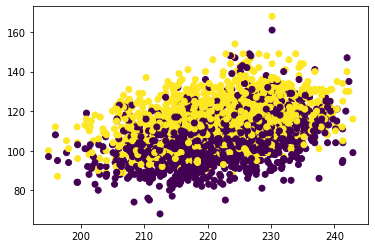

35
['PercentBet_OU'] vs ['Average_Odds_OU']


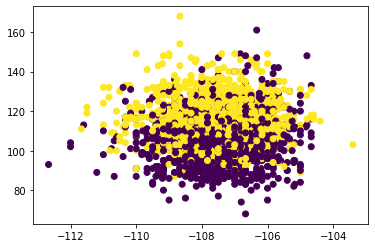

36
['Average_Line_OU'] vs ['Average_Odds_OU']


In [20]:
correlation_graphs(df_spread,'Spread WL')

In [21]:
# Now lets make final drops before applying ML model
# Maybe Include PercentBet_ML, PercentBet_Spread, Average_Line_Spread if needed***
df_spread = df_spread[['Location','PercentBet_ML','Average_Line_ML','PercentBet_Spread','Average_Line_Spread','Average_Odds_Spread','PercentBet_OU','Average_Line_OU','Average_Odds_OU','Spread WL']]
df_spread

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Spread WL  
0              210.92          -106.17          0  
1              210.92          -108.83          1  
2              220.83          -108.33          1  
3              220.83          -106.67          0  
4              221.08          -108.67          0  
...               ...              ...        ...  
2447           218.42          -107.17          0  
2448           225.50          -107.40          1  
2449           225.50          -106.60          0  
2450           227.00          -107.67          0  
2451           227.00          -107.33          1  

[2452 rows x 10 columns]

In [22]:
# Converting Categorical Variables to numeric for ML algorithm
location_spread = pd.get_dummies(df_spread.Location)
final_spread_df = df_spread.join(location_spread).drop(columns='Location',axis=1)
final_spread_df

PercentBet_ML  Average_Line_ML  PercentBet_Spread  Average_Line_Spread  \
0              46.0            183.2               45.1                 4.70   
1              54.0           -210.4               54.9                -4.70   
2              55.7            713.6               42.4                12.50   
3              44.3          -1015.4               57.6               -12.50   
4              58.9           -162.0               58.6                -3.50   
...             ...              ...                ...                  ...   
2447           45.2           -888.8               59.6               -12.67   
2448           61.6            262.8               39.7                 7.33   
2449           38.4           -311.2               60.3                -7.33   
2450           58.1            131.0               58.3                 3.67   
2451           41.9           -147.8               41.7                -3.67   

      Average_Odds_Spread  PercentBet_OU  Average_Line_OU  Average_Odds_OU  \
0                 -105.80           56.9           210.92          -106.17   
1                 -108.20           43.1           210.92          -108.83   
2                 -106.00           52.2           220.83          -108.33   
3                 -109.83           47.8           220.83          -106.67   
4                 -109.40           56.7           221.08          -108.67   
...                   ...            ...              ...              ...   
2447              -107.67           43.8           218.42          -107.17   
2448              -108.67           46.5           225.50          -107.40   
2449              -110.17           53.5           225.50          -106.60   
2450              -107.50           55.7           227.00          -107.67   
2451              -107.50           44.3           227.00          -107.33   

      Spread WL  away  home  
0             0     1     0  
1             1     0     1  
2             1     1     0  
3             0     0     1  
4             0     1     0  
...         ...   ...   ...  
2447          0     0     1  
2448          1     1     0  
2449          0     0     1  
2450          0     1     0  
2451          1     0     1  

[2452 rows x 11 columns]

In [23]:
# Splitting the Target Variable and the features
y_spread = final_spread_df['Spread WL']
X_spread = final_spread_df.drop(columns=['Spread WL'],axis=1).values

In [24]:
# Splitting the Data into Training and Testing sets
X_train_spread,X_test_spread,y_train_spread,y_test_spread = train_test_split(X_spread,y_spread,random_state=42)

In [25]:
# Scaling the data

# Creating instance of scaler
scaler_spread = skl.preprocessing.StandardScaler()

# Fit the scaler
scaler_spread.fit(X_train_spread)

# Scale the Data
X_train_scaled_spread = scaler_spread.transform(X_train_spread)
X_test_scaled_spread = scaler_spread.transform(X_test_spread)

# Export Standard Scaler
pickle.dump(scaler_spread,open('/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Test Connections/scaler_spread.pkl','wb'))
pickle.dump(scaler_spread,open("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Machine Learning/Models/scaler_spread.pkl",'wb'))

In [26]:
# Create the Neural Network Model
nn_model_spread = tf.keras.models.Sequential()

# Add the Layers

# Adding First Hidden Layer with Input Dimensions(7)
nn_model_spread.add(tf.keras.layers.Dense(units=10,activation='relu',input_dim=10))

# Adding Second Hidden Layer
#nn_model_spread.add(tf.keras.layers.Dense(units=7,activation='relu'))

# Adding Output Layer
nn_model_spread.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check Layout of Neural Network
nn_model_spread.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [27]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)

# Compile the Network
nn_model_spread.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Run the Network
fit_model_spread = nn_model_spread.fit(X_train_scaled_spread,y_train_spread,epochs=150)

Epoch 1/150
58/58 [==============================] - 0s 1ms/step - loss: 0.7652 - accuracy: 0.5024
Epoch 2/150
58/58 [==============================] - 0s 1ms/step - loss: 0.7353 - accuracy: 0.4992
Epoch 3/150
58/58 [==============================] - 0s 1ms/step - loss: 0.7216 - accuracy: 0.4943
Epoch 4/150
58/58 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.4997
Epoch 5/150
58/58 [==============================] - 0s 1ms/step - loss: 0.7086 - accuracy: 0.4986
Epoch 6/150
58/58 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.5057
Epoch 7/150
58/58 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.5106
Epoch 8/150
58/58 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.5193
Epoch 9/150
58/58 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.5182
Epoch 10/150
58/58 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5204
Epoch 11/

58/58 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5519
Epoch 83/150
58/58 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5563
Epoch 84/150
58/58 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5563
Epoch 85/150
58/58 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5585
Epoch 86/150
58/58 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5557
Epoch 87/150
58/58 [==============================] - 0s 969us/step - loss: 0.6829 - accuracy: 0.5590
Epoch 88/150
58/58 [==============================] - 0s 979us/step - loss: 0.6828 - accuracy: 0.5612
Epoch 89/150
58/58 [==============================] - 0s 991us/step - loss: 0.6827 - accuracy: 0.5541
Epoch 90/150
58/58 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5536
Epoch 91/150
58/58 [==============================] - 0s 986us/step - loss: 0.6832 - accuracy: 0.5552
Epoch

In [28]:
nn_model_spread.evaluate(X_test_scaled_spread,y_test_spread)

20/20 [==============================] - 0s 882us/step - loss: 0.7155 - accuracy: 0.4617


[0.7154760360717773, 0.46166396141052246]

In [29]:
nn_model_spread.save("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Test Connections/nn_model_spread.h5")
nn_model_spread.save("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Machine Learning/Models/nn_model_spread.h5")

# Over/Under

In [30]:
df_OU = df.copy()
df_OU = df_OU.drop(columns=['MoneyLine WL','Spread WL'])
df_OU

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Pts  Spread Result  Total  \
0              210.92          -106.17   87     -18      L    192   
1              210.92          -108.83  105      18      W    192   
2              220.83          -108.33  100      -8      L    208   
3              220.83          -106.67  108       8      W    208   
4              221.08          -108.67  113       1      W    225   
...               ...              ...  ...     ...    ...    ...   
2447           218.42          -107.17   99       4      W    194   
2448           225.50          -107.40  137      -6      L    280   
2449           225.50          -106.60  143       6      W    280   
2450           227.00          -107.67  131      -5      L    267   
2451           227.00          -107.33  136       5      W    267   

      Over/Under WL  
0                 0  
1                 1  
2                 0  
3                 1  
4                 1  
...             ...  
2447              1  
2448              1  
2449              0  
2450              1  
2451              0  

[2452 rows x 14 columns]

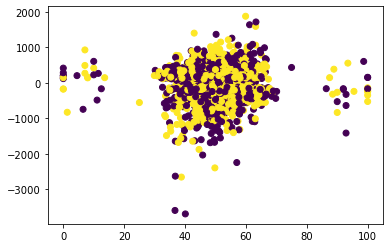

1
['Location'] vs ['PercentBet_ML']


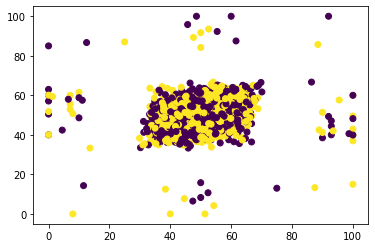

2
['Location'] vs ['Average_Line_ML']


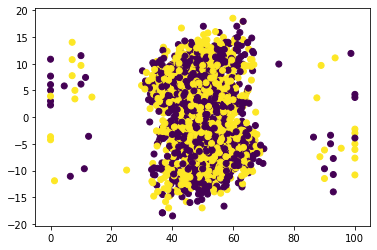

3
['Location'] vs ['PercentBet_Spread']


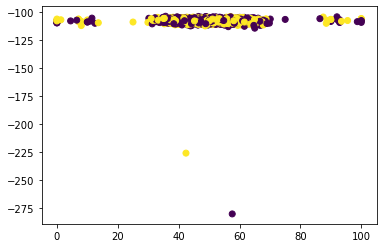

4
['Location'] vs ['Average_Line_Spread']


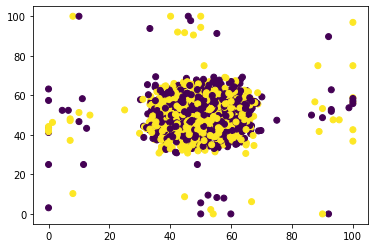

5
['Location'] vs ['Average_Odds_Spread']


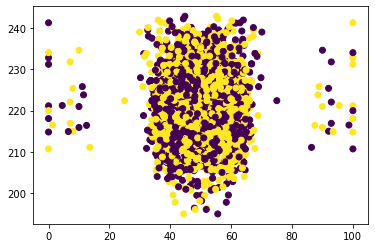

6
['Location'] vs ['PercentBet_OU']


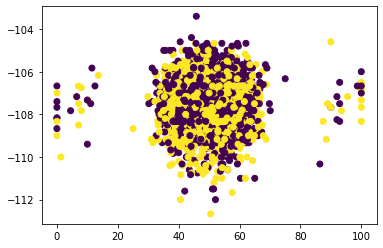

7
['Location'] vs ['Average_Line_OU']


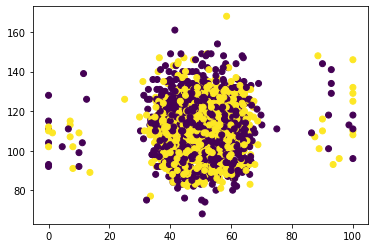

8
['Location'] vs ['Average_Odds_OU']


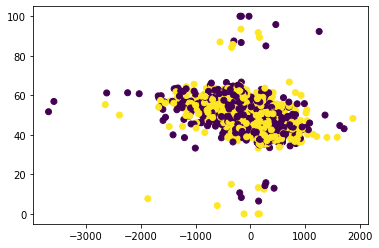

9
['PercentBet_ML'] vs ['Average_Line_ML']


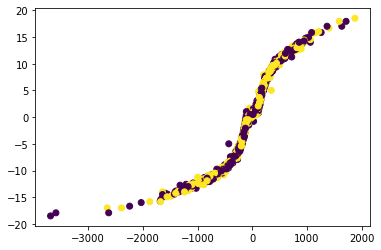

10
['PercentBet_ML'] vs ['PercentBet_Spread']


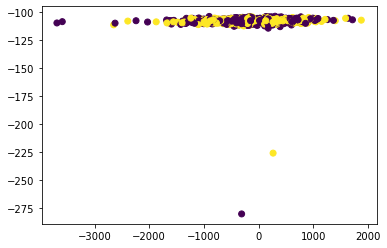

11
['PercentBet_ML'] vs ['Average_Line_Spread']


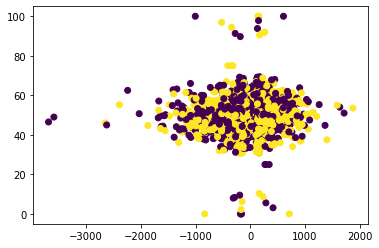

12
['PercentBet_ML'] vs ['Average_Odds_Spread']


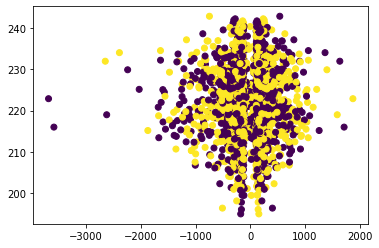

13
['PercentBet_ML'] vs ['PercentBet_OU']


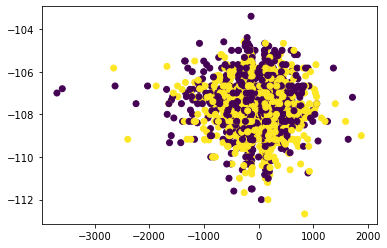

14
['PercentBet_ML'] vs ['Average_Line_OU']


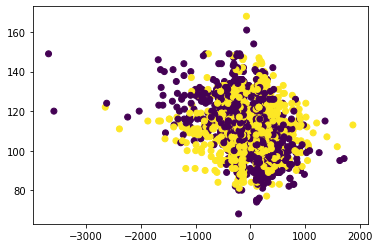

15
['PercentBet_ML'] vs ['Average_Odds_OU']


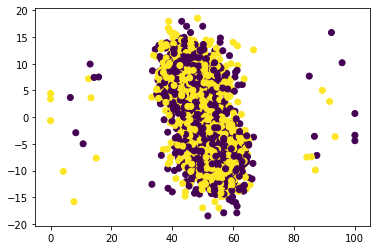

16
['Average_Line_ML'] vs ['PercentBet_Spread']


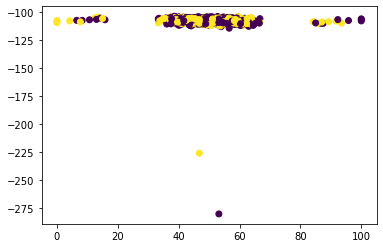

17
['Average_Line_ML'] vs ['Average_Line_Spread']


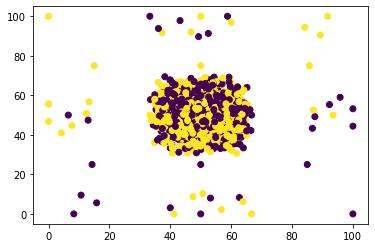

18
['Average_Line_ML'] vs ['Average_Odds_Spread']


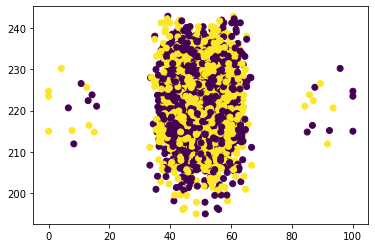

19
['Average_Line_ML'] vs ['PercentBet_OU']


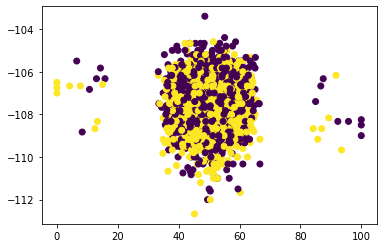

20
['Average_Line_ML'] vs ['Average_Line_OU']


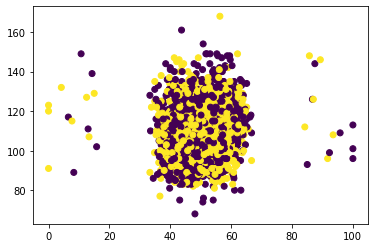

21
['Average_Line_ML'] vs ['Average_Odds_OU']


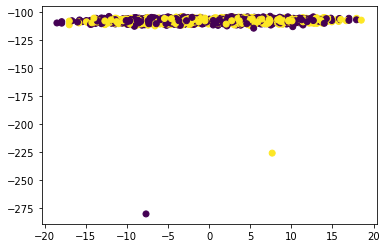

22
['PercentBet_Spread'] vs ['Average_Line_Spread']


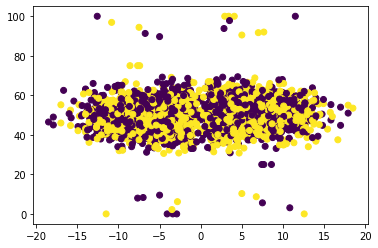

23
['PercentBet_Spread'] vs ['Average_Odds_Spread']


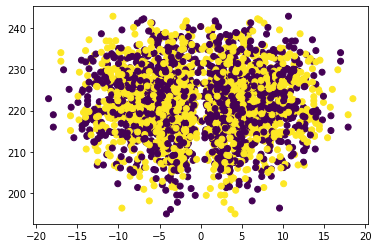

24
['PercentBet_Spread'] vs ['PercentBet_OU']


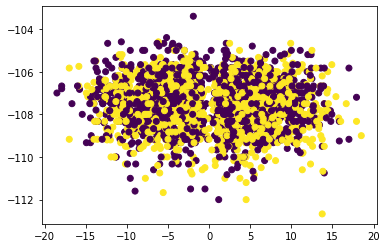

25
['PercentBet_Spread'] vs ['Average_Line_OU']


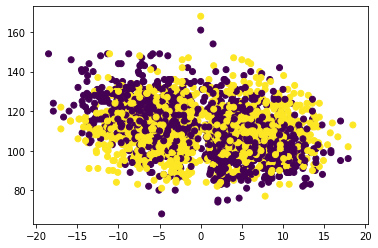

26
['PercentBet_Spread'] vs ['Average_Odds_OU']


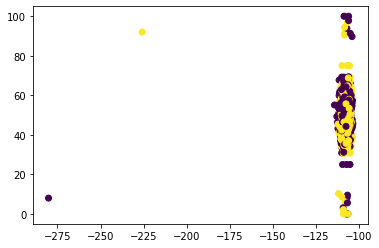

27
['Average_Line_Spread'] vs ['Average_Odds_Spread']


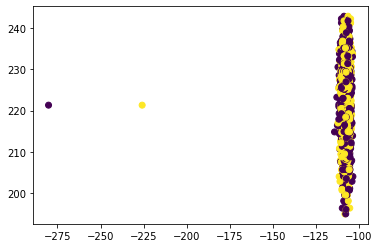

28
['Average_Line_Spread'] vs ['PercentBet_OU']


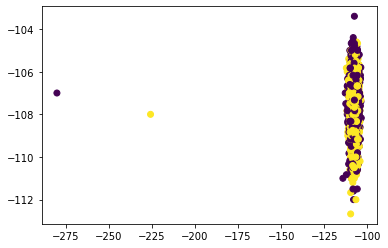

29
['Average_Line_Spread'] vs ['Average_Line_OU']


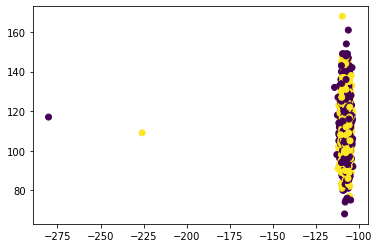

30
['Average_Line_Spread'] vs ['Average_Odds_OU']


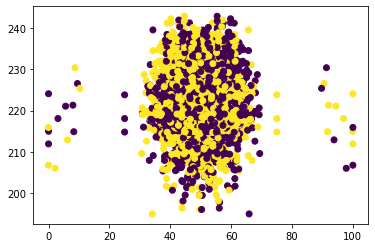

31
['Average_Odds_Spread'] vs ['PercentBet_OU']


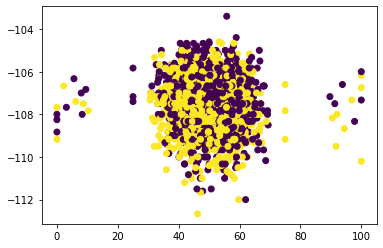

32
['Average_Odds_Spread'] vs ['Average_Line_OU']


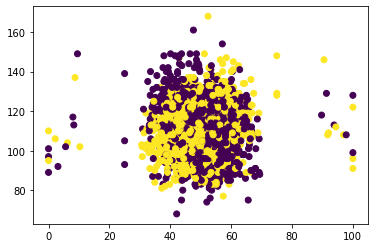

33
['Average_Odds_Spread'] vs ['Average_Odds_OU']


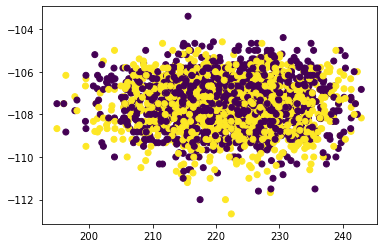

34
['PercentBet_OU'] vs ['Average_Line_OU']


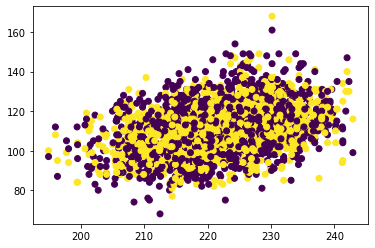

35
['PercentBet_OU'] vs ['Average_Odds_OU']


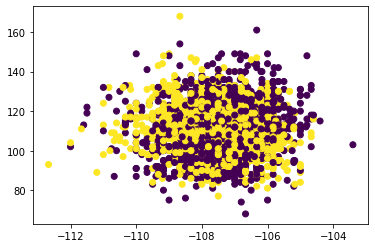

36
['Average_Line_OU'] vs ['Average_Odds_OU']


In [31]:
correlation_graphs(df_OU,'Over/Under WL')

In [32]:
df_OU = df_OU[['Location','PercentBet_ML','Average_Line_ML','PercentBet_Spread','Average_Line_Spread','Average_Odds_Spread','PercentBet_OU','Average_Line_OU','Average_Odds_OU','Over/Under WL']]
df_OU

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Over/Under WL  
0              210.92          -106.17              0  
1              210.92          -108.83              1  
2              220.83          -108.33              0  
3              220.83          -106.67              1  
4              221.08          -108.67              1  
...               ...              ...            ...  
2447           218.42          -107.17              1  
2448           225.50          -107.40              1  
2449           225.50          -106.60              0  
2450           227.00          -107.67              1  
2451           227.00          -107.33              0  

[2452 rows x 10 columns]

In [33]:
# Converting Categorical Variables to numeric for ML algorithm
location_OU = pd.get_dummies(df_OU.Location)
final_OU_df = df_OU.join(location_OU).drop(columns='Location',axis=1)
final_OU_df

PercentBet_ML  Average_Line_ML  PercentBet_Spread  Average_Line_Spread  \
0              46.0            183.2               45.1                 4.70   
1              54.0           -210.4               54.9                -4.70   
2              55.7            713.6               42.4                12.50   
3              44.3          -1015.4               57.6               -12.50   
4              58.9           -162.0               58.6                -3.50   
...             ...              ...                ...                  ...   
2447           45.2           -888.8               59.6               -12.67   
2448           61.6            262.8               39.7                 7.33   
2449           38.4           -311.2               60.3                -7.33   
2450           58.1            131.0               58.3                 3.67   
2451           41.9           -147.8               41.7                -3.67   

      Average_Odds_Spread  PercentBet_OU  Average_Line_OU  Average_Odds_OU  \
0                 -105.80           56.9           210.92          -106.17   
1                 -108.20           43.1           210.92          -108.83   
2                 -106.00           52.2           220.83          -108.33   
3                 -109.83           47.8           220.83          -106.67   
4                 -109.40           56.7           221.08          -108.67   
...                   ...            ...              ...              ...   
2447              -107.67           43.8           218.42          -107.17   
2448              -108.67           46.5           225.50          -107.40   
2449              -110.17           53.5           225.50          -106.60   
2450              -107.50           55.7           227.00          -107.67   
2451              -107.50           44.3           227.00          -107.33   

      Over/Under WL  away  home  
0                 0     1     0  
1                 1     0     1  
2                 0     1     0  
3                 1     0     1  
4                 1     1     0  
...             ...   ...   ...  
2447              1     0     1  
2448              1     1     0  
2449              0     0     1  
2450              1     1     0  
2451              0     0     1  

[2452 rows x 11 columns]

In [34]:
# Splitting the Target Variable and the Features 
y_OU = final_OU_df['Over/Under WL']
X_OU = final_OU_df.drop(columns=['Over/Under WL'],axis=1).values

In [35]:
# Splitting the Data into Training and Testing sets
X_train_OU,X_test_OU,y_train_OU,y_test_OU = train_test_split(X_OU,y_OU,random_state=42)

In [36]:
# Scaling the Data

# Creating instance of scaler
scaler_OU = skl.preprocessing.StandardScaler()

# Fit the scaler
scaler_OU.fit(X_train_OU)

# Scale the Data
X_train_scaled_OU = scaler_OU.transform(X_train_OU)
X_test_scaled_OU = scaler_OU.transform(X_test_OU)

# Export Standard Scaler
pickle.dump(scaler_OU,open('/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Test Connections/scaler_OU.pkl','wb'))
pickle.dump(scaler_OU,open("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Machine Learning/Models/scaler_OU.pkl",'wb'))

In [45]:
# Create the Neural Network Model 
nn_model_OU = tf.keras.models.Sequential()

# Add the Layers

# Adding the First Hidden Layer and Input Dimensions(10)
nn_model_OU.add(tf.keras.layers.Dense(units=10,activation='relu',input_dim=10))

# Adding the Second Hidden Layer
#nn_model_OU.add(tf.keras.layers.Dense(units=10,activation='relu'))

# Adding the Output Layer
nn_model_OU.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
#'softmax'

# Check Layout of Neural Network
nn_model_OU.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [46]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)

# Compile the Network
nn_model_OU.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Run the Network
fit_model_OU = nn_model_OU.fit(X_train_scaled_OU,y_train_OU,epochs=100)

Epoch 1/100
58/58 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.5117
Epoch 2/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5128
Epoch 3/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5188
Epoch 4/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5171
Epoch 5/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5394
Epoch 6/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5443
Epoch 7/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5269
Epoch 8/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5476
Epoch 9/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5416
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5356
Epoch 11/

58/58 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.5704
Epoch 84/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5813
Epoch 85/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.5867
Epoch 86/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.5867
Epoch 87/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.5742
Epoch 88/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.5846
Epoch 89/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.5824
Epoch 90/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.5884
Epoch 91/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5840
Epoch 92/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.5840
Epoch 93/100


In [47]:
nn_model_OU.evaluate(X_test_scaled_OU,y_test_OU)

20/20 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.5302


[0.7205989360809326, 0.5301794409751892]

In [48]:
nn_model_OU.save("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Test Connections/nn_model_OU.h5")
nn_model_OU.save("/Users/kitwilliams/Documents/BOOTCAMP/Final_Project/Repos/Main/Team-3-Project/Machine Learning/Models/nn_model_OU.h5")